##### @Time    : 2019/4/7
##### @Author  : ChanLiang
##### @Github  ：https://github.com/ChanLiang

# k均值

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 先看最基本的k均值算法

### 1. 读数据

In [48]:
####################################################################################################################
''' 从 testSet.txt 中一行行读取用tab分割的浮点数 '''

def loadDataSet(fileName):
    
    ''' 打开文件 '''
    
    file = open(fileName)
    
    ''' 逐行读取，保存为二维数组 '''
    
    matrix = []
    for line in file.readlines():
        line = line.strip().split()
        line = [float(char) for char in line]   # 把list中的字符逐个转化成浮点型(py3中用map(func, list)会真弄成map...)
        matrix.append(line)
    
    ''' 关闭文件，返回 matrix '''
        
    file.close()
    return np.array(matrix)

In [119]:
''' 测试文件读取函数 '''

dataMatrix = loadDataSet('testSet.txt')
print (len(dataMatrix))
print (dataMatrix)

80
[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]
 [ 3.165506 -3.999838]
 [-2.786837 -3.099354]
 [ 4.208187  2.984927]
 [-2.123337  2.943366]
 [ 0.704199 -0.479481]
 [-0.39237  -3.963704]
 [ 2.831667  1.574018]
 [-0.790153  3.343144]
 [ 2.943496 -3.357075]
 [-3.195883 -2.283926]
 [ 2.336445  2.875106]
 [-1.786345  2.554248]
 [ 2.190101 -1.90602 ]
 [-3.403367 -2.778288]
 [ 1.778124  3.880832]
 [-1.688346  2.230267]
 [ 2.592976 -2.054368]
 [-4.007257 -3.207066]
 [ 2.257734  3.387564]
 [-2.679011  0.785119]
 [ 0.939512 -4.023563]
 [-3.674424 -2.261084]
 [ 2.046259  2.735279]
 [-3.18947   1.780269]
 [ 4.372646 -0.822248]
 [-2.579316 -3.497576]
 [ 1.889034  5.1904  ]
 [-0.798747  2.185588]
 [ 2.83652  -2.658556]
 [-3.837877 -3.253815]
 [ 2.096701  3.886007]
 [-2.709034  2.923887]
 [ 3.367037 -3.184789]
 [-2.121

## 2. 生成k个中心点的函数

随机生成`一定范围内的`k个质心(簇中心点)的函数（注意：x_min <= x <= x_max, 各维度都一样）

In [73]:
#####################################################################################################
''' 随机生成k个质心(簇中心点)的函数 '''

def gen_centroids(k, dataSet):
    
    ''' 先随机初始化出来 '''
    
    dim = len(dataSet[0])
    centroids = np.zeros((k, dim))
    
    ''' 逐个维度去生成，每一维度Xi都要满足， xi_min <= Xi <= xi_max'''
    
    for d in range(dim):
        xd_min = np.min(dataSet[:, d])
        xd_max = np.max(dataSet[:, d])
        centroids[:, d] = xd_min + (xd_max - xd_min) * np.random.rand(k)   # 随机数维度不用加()了
        
    return centroids
        

In [74]:
''' 测试生成质心的范围 '''

test_data = np.arange(3, 7).reshape((2, 2))
print ('test_data = ', test_data)
gen_centroids(3, test_data)

test_data =  [[3 4]
 [5 6]]


array([[4.93905215, 4.60373416],
       [3.54303634, 5.1012873 ],
       [3.21580921, 4.39038208]])

没毛病

## 3. 万事具备，开始写kMeans算法了

In [104]:
''' 传入 数据集 和 簇数， 传出中心点列表 和 assign_matrix[m][2]: 第一维表示每个点被分到哪个簇里了，第二维表示该点到所在簇中心的距离'''

def kMeans(dataSet, k):
    
    ''' 初始化中心点 及 记录点分配的矩阵 '''
    
    centroids = gen_centroids(k, dataSet)
    assign_matrix = np.zeros((len(dataSet), 2))
    assign_changed = True
    
    while assign_changed:
        assign_changed = False
        
        ''' 把每个点分配到最近的中心点去 '''
        
        for i in range(len(dataSet)):
            distances = np.sum((np.tile(dataSet[i], (k, 1)) - centroids) ** 2, axis = 1) ** 0.5
            centroid_index = np.argmin(distances)
            if assign_matrix[i][0] != centroid_index:
                assign_changed = True
            assign_matrix[i][0], assign_matrix[i][1] = centroid_index, distances[centroid_index]
            
        ''' 更新各簇中心点(质心) '''
        
        cent_points = [[] for _ in range(k)]
        for j in range(k):  # 更新第j个簇的质心
            for i in range(len(dataSet)):
                if assign_matrix[i][0] == j:
                    cent_points[j].append(dataSet[i])
            centroids[j, :] = np.mean(cent_points[j], axis = 0)
            
    ''' 迭代结束时，返回 簇中心点 及 所有点的分配矩阵 '''
    #print (assign_matrix)
    return centroids, np.array(cent_points)

In [114]:
''' 验证kMean算法 '''

centroids, cent_points = kMeans(dataMatrix, 4)
cent_points = [np.array(cent_points[i]) for i in range(4)]
centroids = [np.array(centroids[i]) for i in range(4)]

## 3.聚类结果可视化

可视化后可以看到，黑色的四个点正是这四个簇中心点

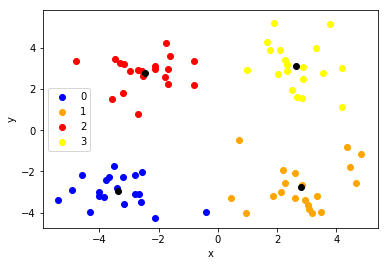

In [117]:
''' 画出所有点 '''

plt.scatter(cent_points[0][:, 0],cent_points[0][:, 1], color='blue', label='0')
plt.scatter(cent_points[1][:, 0],cent_points[1][:, 1], color='orange', label='1')
plt.scatter(cent_points[2][:, 0],cent_points[2][:, 1], color='red', label='2')
plt.scatter(cent_points[3][:, 0],cent_points[3][:, 1], color='yellow', label='3')

''' 画出所有质心 '''

for i in range(4):
    plt.scatter(centroids[i][0],centroids[i][1], color='black')
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 结束！